In [1]:
import pandas as pd
import numpy as np

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", context = "notebook")


In [2]:
data_path = "C:\juy\insurance.csv" 
df_mcpd = pd.read_csv(data_path)
df_mcpd.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
import seaborn as sns

In [4]:
from statsmodels.genmod.generalized_linear_model import GLM

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error 

In [8]:
X = df_mcpd[['age', 'bmi', 'children']]
y = df_mcpd['charges']

test_size = 0.2
random_state = 9384

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size   = test_size,
                                        random_state = random_state
                                        )

print("Train dataset size : {}".format(len(y_train)))
print("Test dataset size : {}".format(len(y_test)))

Train dataset size : 1070
Test dataset size : 268


In [9]:
X=df_mcpd['age']
y=df_mcpd['charges']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

import warnings
warnings.filterwarnings('ignore')

In [13]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    2707.051837
age       267.740141
dtype: float64

In [14]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [15]:
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [16]:
#Imporitng libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



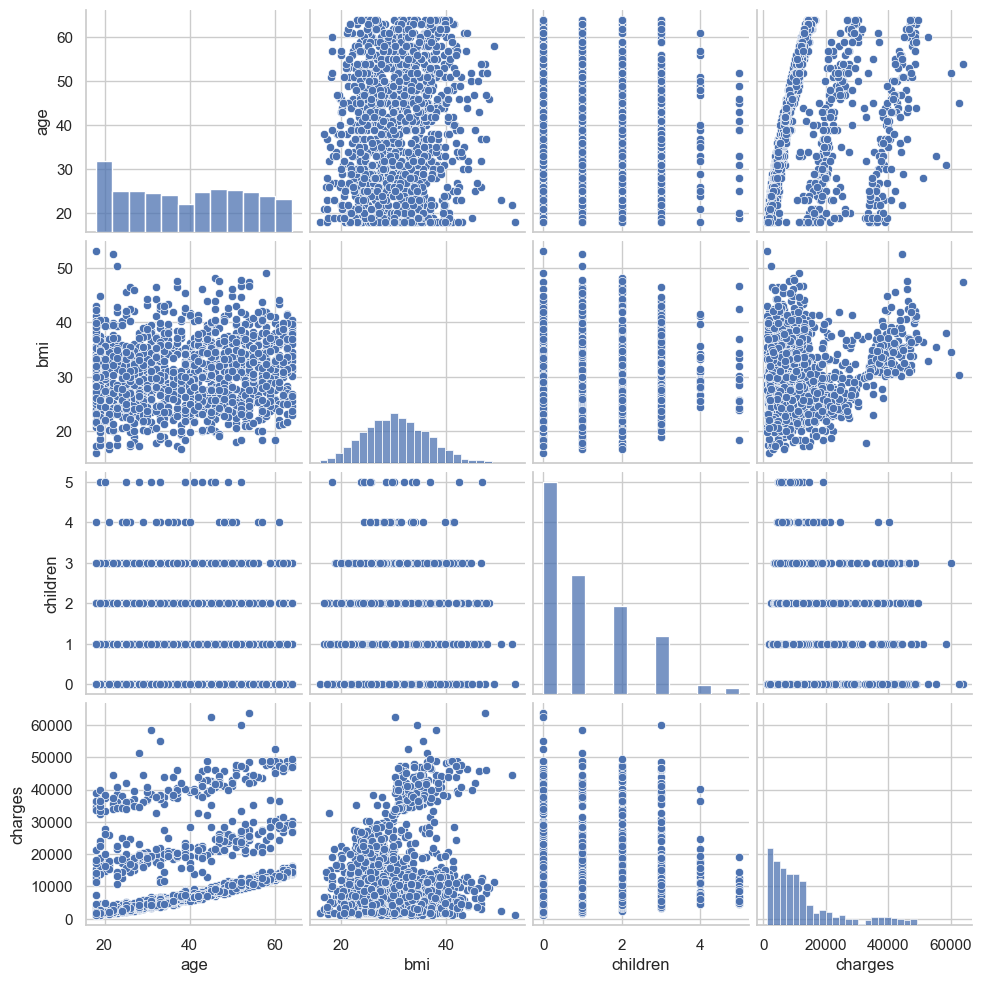

In [18]:
numeric_cols = ["age","bmi","children","charges"]
sns.pairplot(df_mcpd[numeric_cols], height = 2.5)
plt.plot()
plt.show()

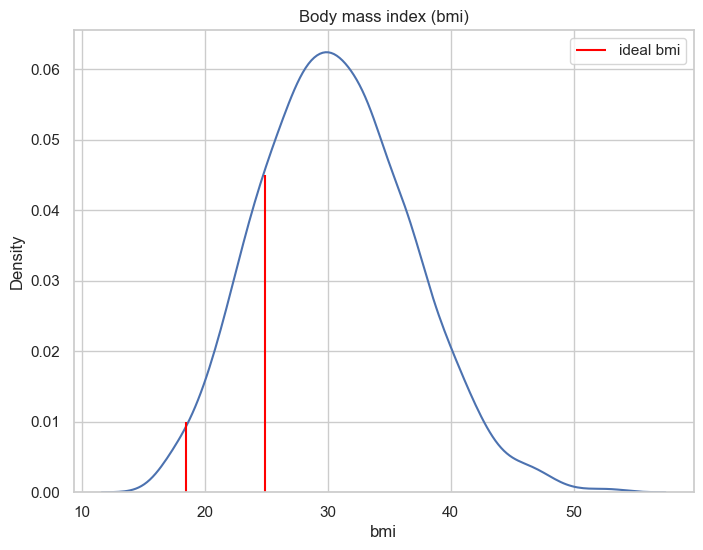

Percentage of people with the ideal bmi with respect to the sample : 16.59 %


In [19]:
li_ideally = 18.5
ls_ideally = 24.9

fig, ax = plt.subplots(figsize = (8,6))
sns.kdeplot(data = df_mcpd, x = "bmi", ax = ax)
ax.vlines(x = li_ideally, ymin = 0, ymax = 0.01, color = "red", label = "ideal bmi")
ax.vlines(x = ls_ideally, ymin = 0, ymax = 0.045, color = "red")
plt.title("Body mass index (bmi)")
plt.legend()
plt.show()
bmi_ideally_bool = (df_mcpd["bmi"] >= li_ideally) & (df_mcpd["bmi"] <= ls_ideally)
ideally_per = len(df_mcpd["bmi"][bmi_ideally_bool])/len(df_mcpd)
print("Percentage of people with the ideal bmi with respect to the sample : {0:0.2f} %".format(100*ideally_per))

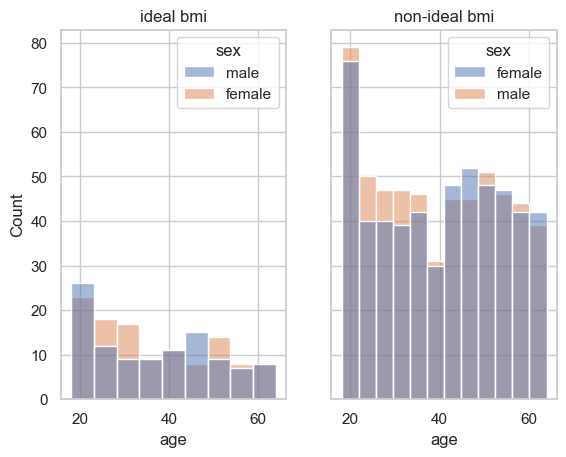

In [21]:
df_ages_bmiIdeal = df_mcpd[bmi_ideally_bool]
df_ages_no_bmiIdeal = df_mcpd[bmi_ideally_bool == False]

fig, ax = plt.subplots(1,2, sharey=True)
sns.histplot(data = df_ages_bmiIdeal, x = "age",  hue = "sex", ax = ax[0])
ax[0].set_title("ideal bmi")
sns.histplot(data = df_ages_no_bmiIdeal, x = "age", hue = "sex", ax = ax[1])
ax[1].set_title("non-ideal bmi")
plt.show()

<Axes: >

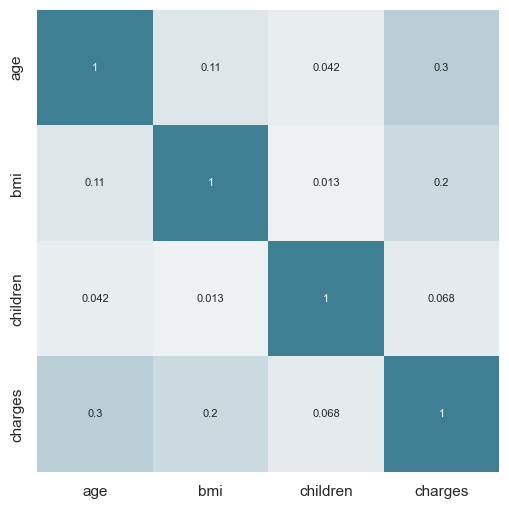

In [26]:
corr_matrix = df_mcpd.select_dtypes(["float64","int64"]).corr()

fig, ax = plt.subplots(figsize = (6,6))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

In [29]:
# Build and fit the model 
X_train = sm.add_constant(X_train, prepend=True)
lm = sm.OLS(endog=y_train, exog=X_train,)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     99.76
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           2.18e-22
Time:                        22:03:16   Log-Likelihood:                -10082.
No. Observations:                 936   AIC:                         2.017e+04
Df Residuals:                     934   BIC:                         2.018e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2707.0518   1113.327      2.431      0.0

In [30]:
y_train_pred = lm.predict(exog = X_train)
residuals_train   = y_train_pred - y_train

[]

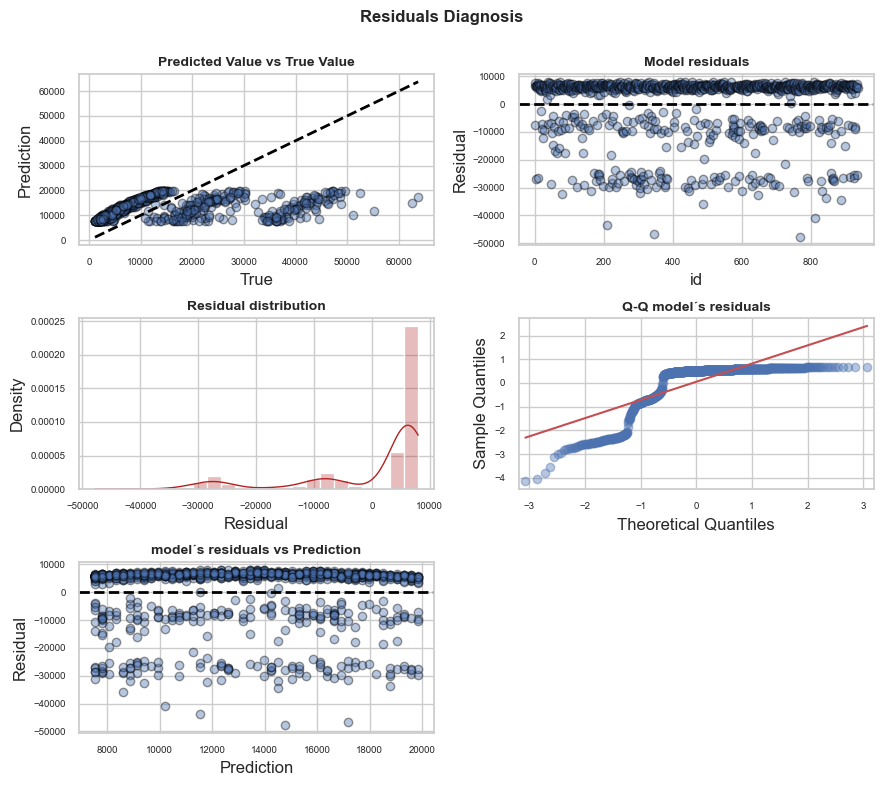

In [32]:
# residuals Diagnosis

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, y_train_pred, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted Value vs True Value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('True')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model residuals', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residual')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuals_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title("Residual distribution", fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residual")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuals_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q model´s residuals', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(y_train_pred, residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('model´s residuals vs Prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Residual')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Residuals Diagnosis', fontsize = 12, fontweight = "bold")
plt.plot()